In [25]:
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

<b>Задание 1</b><br>
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [26]:
import numpy as np
import math

# salary:-------------
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
# credit-score:-------
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
# size:---------------
n = min(x.size,y.size);

print ("Initial data:\n salary={}\n credit score={}\n length={}\n".format(x,y,n))



Initial data:
 salary=[ 35.  45. 190. 200.  40.  70.  54. 150. 120. 110.]
 credit score=[401. 574. 874. 919. 459. 739. 653. 902. 746. 832.]
 length=10



$Y[i] = a + bX[i] + \varepsilon_i, \varepsilon_i$ = 0
$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$
$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [27]:

b = (np.average(y * x) - np.average(y) * np.average(x)) / (np.average(x**2) - np.average(x) ** 2)
a = np.average(y) - b * np.average(x)

print ("Yi = {}  +  Xi * {}".format(a,b));

Yi = 444.1773573243596  +  Xi * 2.620538882402765


$$r_{xy} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2 \cdot {\sum\limits_{i=1}^{n} (y_i - \overline{y})^2}}} = b \cdot {\frac{\sigma_x}{\sigma_y}}$$

In [28]:
#  Pierson  correlation:---------------
Rxy = b * np.std(x) / np.std(y)
print ("Rxy={}".format(Rxy))


Rxy=0.8874900920739162


$$R_{2} = r^{2}_{xy}$$

In [29]:
# Determination:-----------------------
R2 = Rxy ** 2;
print ("R2={}".format(R2))

R2=0.7876386635293682


$$\overline{ERROR} = \frac{1}{n} \sum\limits_{i=1}^{n} \Bigl |{{\frac{y_i - Y[i]}{y_i}} \Bigr |} \cdot{100\%}$$

In [35]:
Yi = a + b * x
print ("Applying regression: {}".format(Yi))

error= np.average((np.abs((y-Yi)/y))*100)
print ("ERROR = {}".format(error))

Applying regression: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]
ERROR = 11.469251843561707


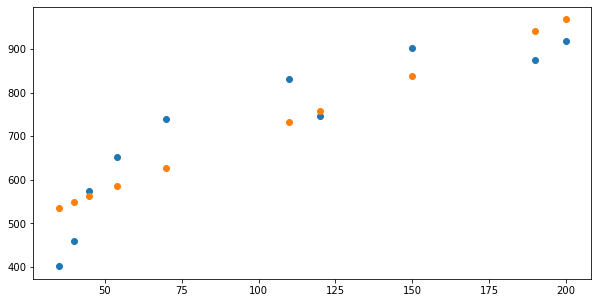

In [34]:
# Plotting results:---------------------------
plt.scatter (x,y)
plt.scatter (x,Yi)


$$F_{факт} = \frac{r_{xy}^{2}}{(1 - r_{xy}^{2})} \cdot \frac{k_2}{k_1}= \frac{r_{xy}^{2} \cdot (n - 2)}{(1 - r_{xy}^{2})}$$

где $k_1$ и $k_2$ — это степени свободы, $k_1$ — количество факторных признаков (для парной линейной регрессии оно равно 1).
$k_2$ = $n - k - 1$, где $n$ — это число наблюдений и $k$ — число факторных признаков (для парной линейной регрессии $k_2 = n - 2$,
то есть числу наблюдений, уменьшенному на 2).

In [37]:
# Calculating Fisher criteria:-------------------------
Fisher = (R2 * (n - 2)) / (1 - R2)
print ("Fisher criteria: {}".format(Fisher))

Fisher criteria: 29.671640859664432


По таблице https://www.chem-astu.ru/science/reference/F-statistic.html
при k1 (f1) =1 и k2 (f2) =8 F = 5.32

In [40]:
print ("Is the regression valuable by Fisher: {}".format(Fisher>5.32))

Is the regression valuable by Fisher: True


 $$t_a = \frac{a}{m_a}$$
 $$t_b = \frac{b}{m_b}$$
 $$m_a  = S_{ост} \cdot {\frac{\sqrt{\sum{x^2}}}{n \cdot {\sigma_x}}}$$
 $$m_b = \frac{S_{ост}}{\sigma_x \cdot{\sqrt{n}}}$$
 $$S_{ост} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - 2}}$$

In [42]:
# Calculating student criteria:------------------------

s_residual = np.sqrt(np.sum((y - Yi)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

t_a = a / m_a
t_b = b / m_b

print ("Student boundaries ta={} tb={}".format(t_a,t_b))

Student boundaries ta=7.866210524668864 tb=5.447168150485579
